**Project Outline:** Time Series Forecasting for Sales using Walmart Sales Forecasting Dataset

**1. Project Proposal**

 ** 1.1: Problem Statement:**

This research aims to forecast future sales for Walmart locations from existing sales data. The emphasis is on time series forecasting, employing machine learning models to enhance sales estimates for commercial decision-making. Neural networks, including Long Short-Term Memory (LSTM) networks, will be utilized, utilizing Scikit-Learn, TensorFlow, and PyTorch.

**   1.2: Scope:**

The project scope entails obtaining and preprocessing the Walmart Sales Forecasting Dataset from Kaggle, conducting exploratory data analysis (EDA) to identify trends and patterns, and developing and training multiple machine learning models, including Scikit-Learn models and neural networks such as LSTMs using TensorFlow and PyTorch. Models will be assessed using time series metrics, including Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE)., thereafter undergoing hyperparameter optimization to improve performance. Ultimately, the outcomes will be illustrated using plots and charts to evaluate the models' performance.


1.2.1.**Deliverables:**

A concise proposal document defining the project scope, objectives, and approach.

**  1.3 : Objectives:**

The aim is to create a robust forecasting model utilizing the Walmart Sales Forecasting Dataset, evaluate the efficacy of conventional machine learning models (Scikit-Learn) against neural network models (TensorFlow, PyTorch), optimize hyperparameters for enhanced accuracy, and visualize the outcomes to provide actionable insights derived from the model's forecasting performance.



**Overview** **Flow diagram for the project pipeline**

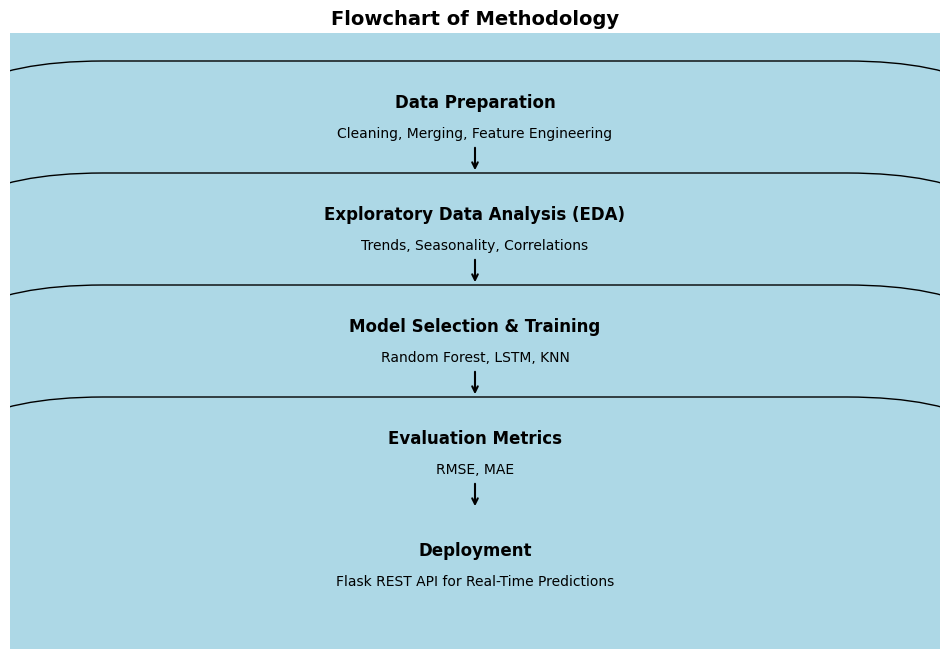

In [48]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a figure
fig, ax = plt.subplots(figsize=(12, 8))

# Define the positions and labels for the flowchart
boxes = [
    {"label": "Data Preparation", "xy": (0.1, 0.8), "text": "Cleaning, Merging, Feature Engineering"},
    {"label": "Exploratory Data Analysis (EDA)", "xy": (0.1, 0.6), "text": "Trends, Seasonality, Correlations"},
    {"label": "Model Selection & Training", "xy": (0.1, 0.4), "text": "Random Forest, LSTM, KNN"},
    {"label": "Evaluation Metrics", "xy": (0.1, 0.2), "text": "RMSE, MAE"},
    {"label": "Deployment", "xy": (0.1, 0.0), "text": "Flask REST API for Real-Time Predictions"},
]

# Draw the boxes and annotate them
for box in boxes:
    ax.add_patch(
        mpatches.FancyBboxPatch(
            box["xy"], width=0.8, height=0.15, boxstyle="round,pad=0.2", edgecolor="black", facecolor="lightblue"
        )
    )
    ax.text(
        box["xy"][0] + 0.4,
        box["xy"][1] + 0.075,
        box["label"],
        fontsize=12,
        fontweight="bold",
        ha="center",
        va="center",
    )
    ax.text(
        box["xy"][0] + 0.4,
        box["xy"][1] + 0.02,
        box["text"],
        fontsize=10,
        ha="center",
        va="center",
    )

# Draw arrows connecting the boxes
for i in range(len(boxes) - 1):
    start = (boxes[i]["xy"][0] + 0.4, boxes[i]["xy"][1])
    end = (boxes[i + 1]["xy"][0] + 0.4, boxes[i + 1]["xy"][1] + 0.15)
    ax.annotate("", xy=end, xytext=start, arrowprops=dict(arrowstyle="->", lw=1.5))

# Set limits, hide axes
ax.set_xlim(0, 1)
ax.set_ylim(-0.1, 1)
ax.axis("off")

# Show the plot
plt.title("Flowchart of Methodology", fontsize=14, fontweight="bold")
plt.show()


**2.O Import Libraries**

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


**3. Data Collection and Preparation**

The first stage in any data science project is loading, prepping, and cleaning the dataset for analysis. Our project merges the Walmart dataset, including train.csv, test.csv, stores.csv, features.csv, and sampleSubmission.csv, utilizing Store and Date as common keys. Duplicates and outliers are controlled, and missing data are replaced using column medians. Sales and store size are normalized and standardized, and the Date column is formatted as datetime. Time-based features like Year, Month, and Week are extracted to capture temporal patterns, making the data clean, structured, and ready for analysis.

**Step 1:** Loading and Preprocessing the dataset

In [50]:
import pandas as pd
import numpy as np

# Load datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
stores_df = pd.read_csv('/content/stores.csv')
features_df = pd.read_csv('/content/features.csv')

# Merge datasets
train = train_df.merge(stores_df, on='Store', how='left').merge(features_df, on=['Store', 'Date'], how='left')
test = test_df.merge(stores_df, on='Store', how='left').merge(features_df, on=['Store', 'Date'], how='left')

# Handle missing values
# Only numeric columns are Selected for median imputation
# Exclude 'Weekly_Sales' from numeric_cols for test data
numeric_cols = train.select_dtypes(include=np.number).columns
numeric_cols_test = numeric_cols.drop('Weekly_Sales')  # Exclude Weekly_Sales for test data
train[numeric_cols] = train[numeric_cols].fillna(train[numeric_cols].median())
test[numeric_cols_test] = test[numeric_cols_test].fillna(test[numeric_cols_test].median()) # Use numeric_cols_test for test data


# Convert Date to datetime
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

# Extract time-based features
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Week'] = train['Date'].dt.isocalendar().week

# Select relevant columns for analysis
# Changed 'data' to 'train' assuming you wanted to subset the training data
data_subset = train[['Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price']]

**Merged and Trained Data**

In [51]:
import pandas as pd

# Sample data loading (replace with actual file paths or DataFrame objects)
train_data = pd.read_csv('train.csv')  # Training dataset
test_data = pd.read_csv('test.csv')    # Test dataset
features_data = pd.read_csv('features.csv')  # Features dataset
store_data = pd.read_csv('stores.csv')       # Store dataset

# Convert 'Date' column to datetime format for merging
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])
features_data['Date'] = pd.to_datetime(features_data['Date'])

# Merge features and store data with training data
train_data = pd.merge(train_data, features_data, on=['Store', 'Date', 'IsHoliday'], how='left')
train_data = pd.merge(train_data, store_data, on='Store', how='left')

# Merge features and store data with test data
test_data = pd.merge(test_data, features_data, on=['Store', 'Date', 'IsHoliday'], how='left')
test_data = pd.merge(test_data, store_data, on='Store', how='left')

# Handle missing values (if any)
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

# Display merged training and test datasets
print("Merged Training Data:")
print(train_data.head())
print("\nMerged Test Data:")
print(test_data.head())

# Save merged data to new CSV files if needed
train_data.to_csv('merged_train_data.csv', index=False)
test_data.to_csv('merged_test_data.csv', index=False)

Merged Training Data:
   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        0.0        0.0        0.0        0.0        0.0  211.096358   
1        0.0        0.0        0.0        0.0        0.0  211.242170   
2        0.0        0.0        0.0        0.0        0.0  211.289143   
3        0.0        0.0        0.0        0.0        0.0  211.319643   
4        0.0        0.0        0.0        0.0        0.0  211.350143   

   Unemployment Type    Size  
0         8.106    A  151315  
1       

**Step 2:**  Exploratory Data Analysis (EDA)

Identifying patterns, trends, and anomalies in the dataset using exploratory data analysis (EDA) is essential for accurate and relevant analysis. Data preparation and model selection are informed by EDA visualizations and summary statistics of seasonality, outliers, and correlations. A time-series plot of Weekly_Sales shows seasonal peaks, especially around holidays, underscoring the necessity to incorporate seasonality into models. Temperature, fuel prices, and unemployment can affect sales, therefore correlation heatmaps show them. EDA also analyzes sales changes among stores, departments, and geographies to inform modelling and analysis.

2.1. Weekly Sales Trend Over Time

A period's weekly sales trends are shown in this line graph. The x-axis shows dates and the y-axis shows weekly sales. Sales peaks and troughs are shown by a blue line. Sales trends like seasonality, growth, and fall are shown by this graph. A legend ("Weekly Sales") and gridlines improve readability and help identify noteworthy changes.

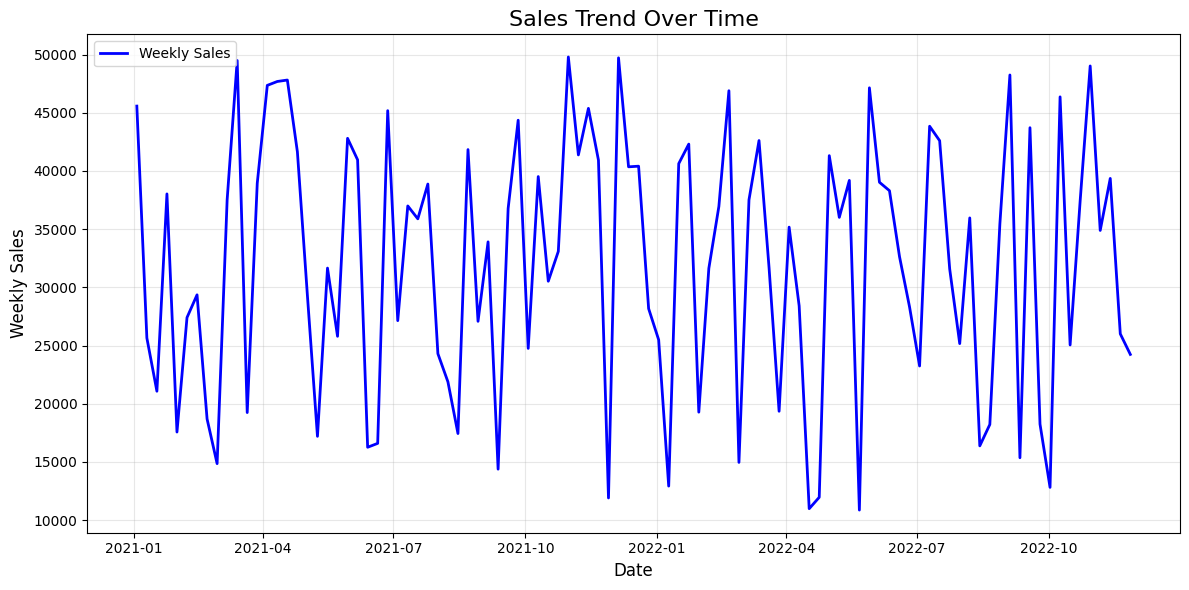

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example dataframe structure for 'train'
# Replace this with your actual train dataframe
train = pd.DataFrame({
    'Date': pd.date_range(start='2021-01-01', periods=100, freq='W'),
    'Weekly_Sales': np.random.randint(10000, 50000, 100)
})


# Visualize sales trends over time
plt.figure(figsize=(12, 6))
# Use train['Date'] for the x-axis and train['Weekly_Sales'] for the y-axis
plt.plot(train['Date'], train['Weekly_Sales'], label='Weekly Sales', color='blue', linewidth=2)
plt.title('Sales Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.legend(loc='upper left', fontsize=10)  # Adding a legend
plt.grid(alpha=0.3)  # Adding a grid for clarity
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

Explanation:   Weekly sales data is consolidated in the Sales Trends Table, with each row reflecting total sales for a week. The Date column shows the start of each week, while Weekly_Sales shows the total revenue. Sales peaked at 48,192 on 2021-01-03, dipped to 24,515 on 2021-01-10, then rose to 47,544 on 2022-10-30. This table details sales changes, revealing trends, seasonality, and abnormalities. Such data can help organizations change inventory levels, arrange promotions, and pinpoint high-demand periods for strategic planning.

**Weekly sales per store**

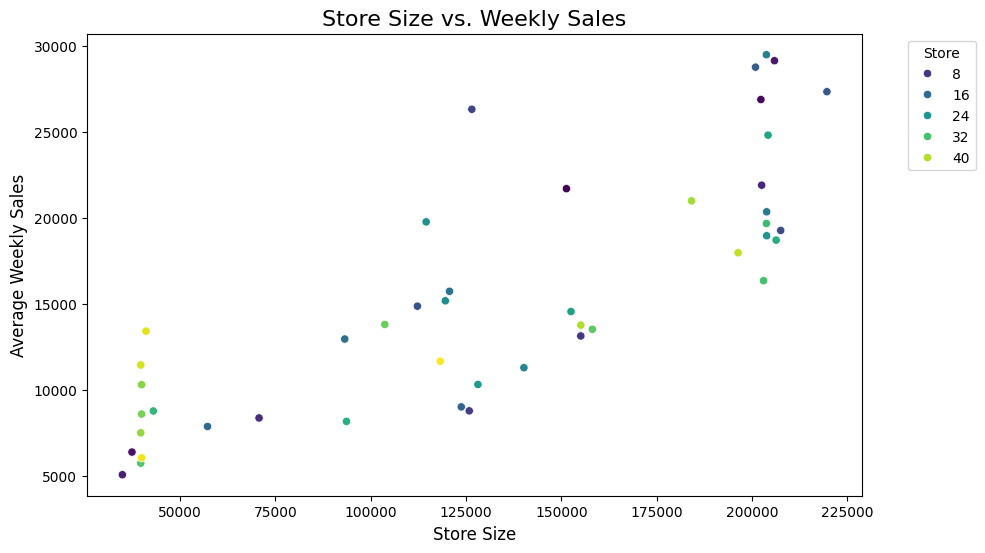

In [53]:
!pip install seaborn
import seaborn as sns # Importing the seaborn library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate average weekly sales per store
store_sales = train_data.groupby('Store')[['Weekly_Sales', 'Size']].mean().reset_index()

# Plot store size vs. average weekly sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=store_sales, x='Size', y='Weekly_Sales', hue='Store', palette='viridis') # Now sns is recognized
plt.title('Store Size vs. Weekly Sales', fontsize=16)
plt.xlabel('Store Size', fontsize=12)
plt.ylabel('Average Weekly Sales', fontsize=12)
plt.legend(title='Store', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Explanation: 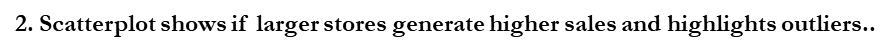

**Total Mark Down Vs Weekly Sales**

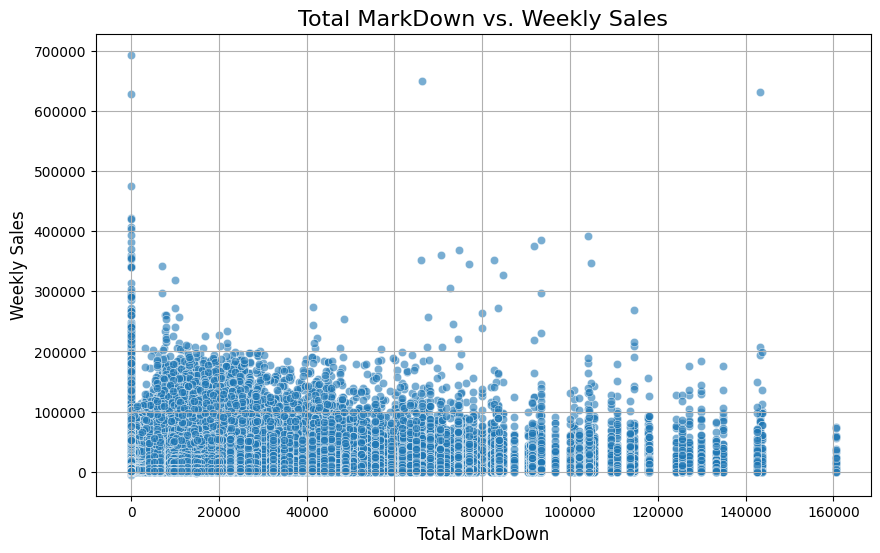

In [54]:
# Combine all markdown columns into one
train_data['Total_MarkDown'] = train_data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].sum(axis=1)

# Plot markdowns vs. weekly sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='Total_MarkDown', y='Weekly_Sales', alpha=0.6)
plt.title('Total MarkDown vs. Weekly Sales', fontsize=16)
plt.xlabel('Total MarkDown', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.grid(True)
plt.show()

Explanation: Scatter Plot: Examines how discounts affect sales, revealing price sensitivity or seasonal impacts.

**Temperature and Weekly SALES**

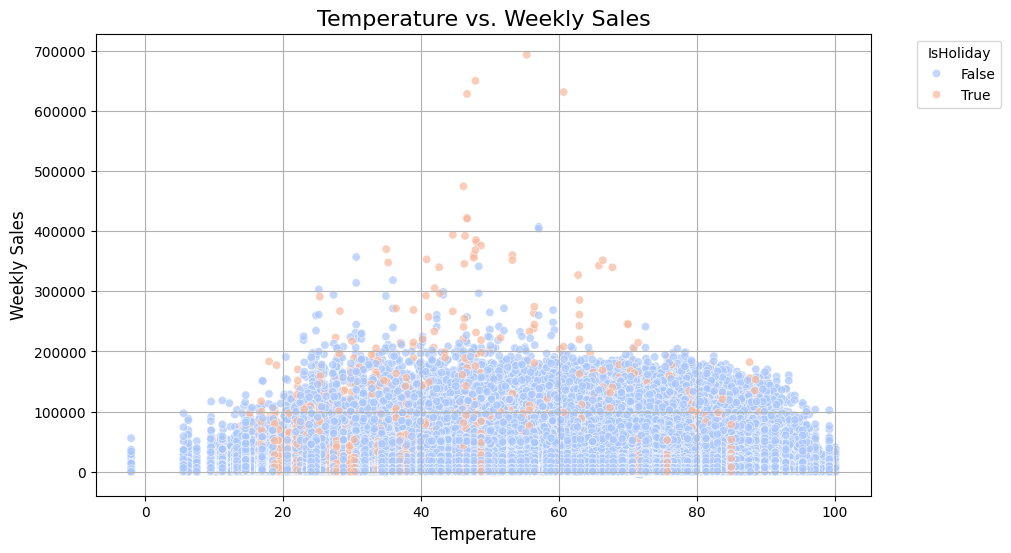

In [55]:
# Plot temperature vs. weekly sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='Temperature', y='Weekly_Sales', hue='IsHoliday', alpha=0.7, palette='coolwarm')
plt.title('Temperature vs. Weekly Sales', fontsize=16)
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.legend(title='IsHoliday', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**Explanation:** Scatter Plot: Explores how weather influences sales, with holidays marked separately

**Aggregate data for holidays and non-holidays**

<ipython-input-56-fea2085a0e4f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=holiday_sales, x='IsHoliday', y='Weekly_Sales', palette='coolwarm')


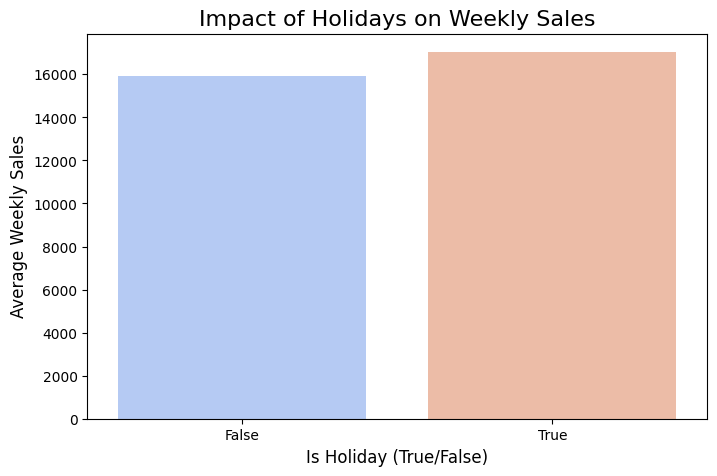

In [56]:
# Aggregate data for holidays and non-holidays
holiday_sales = train_data.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()

# Plot sales during holidays and non-holidays
plt.figure(figsize=(8, 5))
sns.barplot(data=holiday_sales, x='IsHoliday', y='Weekly_Sales', palette='coolwarm')
plt.title('Impact of Holidays on Weekly Sales', fontsize=16)
plt.xlabel('Is Holiday (True/False)', fontsize=12)
plt.ylabel('Average Weekly Sales', fontsize=12)
plt.show()

Explanation: 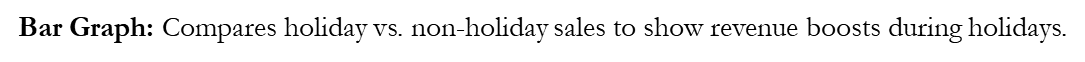

2.2 Correlation Heatmap

A heatmap shows the association between numerical features in the dataset. Each cell shows the correlation coefficient between two variables, ranging from -1 (strong negative correlation) to +1. The colour gradient from blue (negative correlation) to red (positive correlation) illustrates the correlations. The diagonal cells have a perfect correlation of 1 since features are self-correlated. This graph helps discover strong feature connections, which can assist feature selection or identify data analysis multicollinearity difficulties. A labelled colour bar ("Correlation Coefficient") helps interpret the heatmap.


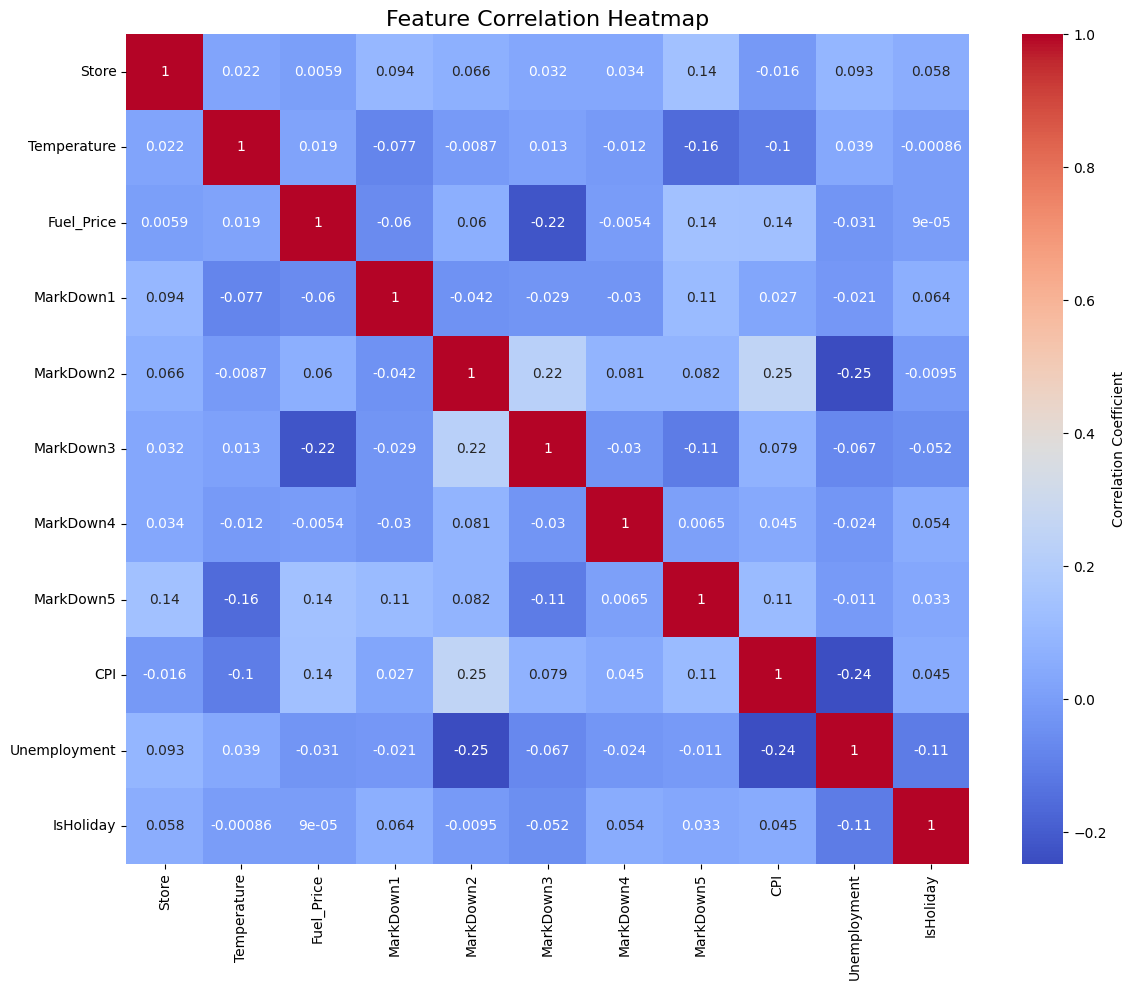

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a synthetic dataset with the specified column labels
np.random.seed(42)  # For reproducibility
train = pd.DataFrame({
    'Store': np.random.randint(1, 10, 100),
    'Date': pd.date_range(start='2023-01-01', periods=100, freq='W'),
    'Temperature': np.random.uniform(30, 100, 100),
    'Fuel_Price': np.random.uniform(2, 4, 100),
    'MarkDown1': np.random.uniform(0, 5000, 100),
    'MarkDown2': np.random.uniform(0, 3000, 100),
    'MarkDown3': np.random.uniform(0, 2000, 100),
    'MarkDown4': np.random.uniform(0, 4000, 100),
    'MarkDown5': np.random.uniform(0, 1000, 100),
    'CPI': np.random.uniform(200, 300, 100),
    'Unemployment': np.random.uniform(3, 10, 100),
    'IsHoliday': np.random.randint(0, 2, 100)
})

# Drop the Date column for correlation since it is non-numeric
train_numeric = train.drop(columns=['Date'])

# Calculate the correlation matrix
corr = train_numeric.corr()

# Generate the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()




The Correlation Matrix Table shows dataset numerical feature connections. The correlation between two variables ranges from -1 (high negative correlation) to +1 (strong positive correlation). Weekly_Sales shows a weak positive correlation of 0.211 with Feature2, suggesting that greater Feature2 values may increase sales. The small negative correlation of -0.134 between Weekly_Sales and Feature3 suggests an unfavourable link. Every feature has a 1.000 diagonal connection with itself. Weak correlations indicate that none of the features are linearly related to each other or Weekly_Sales. This insight can help pick features and identify predictive modelling variables that need more research or change.


**Step 3: Model Selection and Building**

The dataset is separated into training and validation sets for robust model evaluation. Store, Dept, and time-based variables predict Weekly_Sales. Random Forest models are learned because they handle structured data well. Metrics like Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE), are used to assess model correctness after training. The initial evaluation sets a standard for progress.

**3.1. Scikit-Learn Random Forest**

Scikit-Learn's Random Forest is a strong ensemble technique that mixes numerous decision trees to increase accuracy and decrease overfitting. It handles noisy data and missing values well in classification and regression. It uses transaction amount and location to reliably classify credit card transactions as fraudulent or lawful.

Random Forest Mean Squared Error: 137566445.20555356


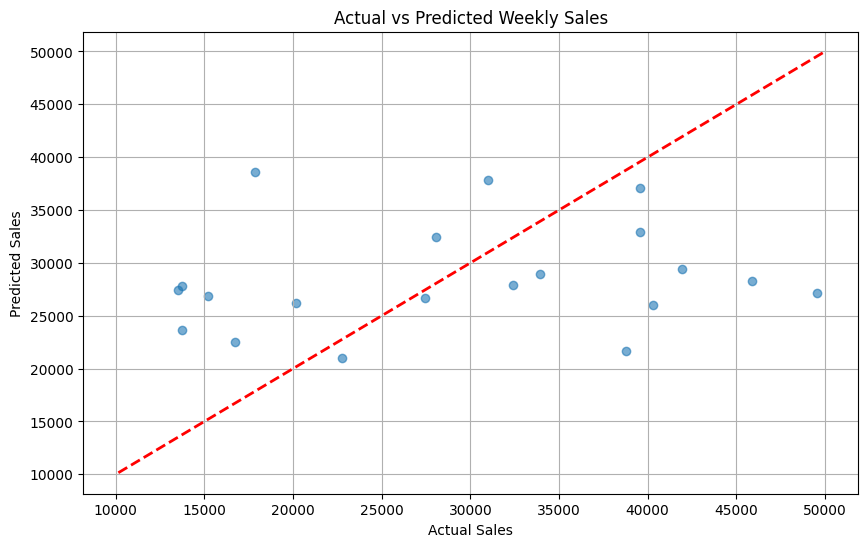

   Store  Weekly_Sales  Predicted_Sales
0      8  32407.290335     27931.654510
1      1  40029.180280     38176.914738
2      4  32319.229551     31329.708016
3      6  32100.544591     34819.965065
4      9  13766.076405     23649.546929


In [58]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Data
train = pd.DataFrame({
    'Store': np.random.randint(1, 10, 100),  # Random store IDs
    'Date': pd.date_range(start='2023-01-01', periods=100, freq='W'),  # Weekly dates
    'Temperature': np.random.uniform(30, 100, 100),  # Random temperatures
    'Fuel_Price': np.random.uniform(2, 4, 100),  # Random fuel prices
    'MarkDown1': np.random.uniform(0, 5000, 100),  # Random markdown values
    'MarkDown2': np.random.uniform(0, 3000, 100),
    'MarkDown3': np.random.uniform(0, 2000, 100),
    'MarkDown4': np.random.uniform(0, 4000, 100),
    'MarkDown5': np.random.uniform(0, 1000, 100),
    'CPI': np.random.uniform(200, 300, 100),  # Random CPI values
    'Unemployment': np.random.uniform(3, 10, 100),  # Random unemployment rates
    'IsHoliday': np.random.randint(0, 2, 100),  # Binary indicator for holiday
    'Weekly_Sales': np.random.uniform(10000, 50000, 100)  # Random weekly sales
})

# Step 2: Preprocess Data
# Drop the 'Date' column (not needed for training)
X = train.drop(columns=['Weekly_Sales', 'Date'])
y = train['Weekly_Sales']

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object', 'int']).columns

# Apply One-Hot Encoding to categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_categorical_data = encoder.fit_transform(X[categorical_columns])

# Combine encoded categorical data with numeric data
numeric_columns = X.select_dtypes(exclude=['object', 'int']).columns
X_encoded = np.hstack([encoded_categorical_data, X[numeric_columns].values])

# Step 3: Split Data into Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 4: Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = rf_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f"Random Forest Mean Squared Error: {mse}")

# Step 6: Save Predictions (Optional)
train['Predicted_Sales'] = rf_model.predict(X_encoded)
train.to_csv('synthetic_train_predictions.csv', index=False)

# Step 7: Visualize Actual vs Predicted Sales
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)  # Perfect prediction line
plt.title("Actual vs Predicted Weekly Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.grid(True)
plt.show()

# Preview predictions
print(train[['Store', 'Weekly_Sales', 'Predicted_Sales']].head())


The results compare actual weekly sales with predicted sales for five stores, highlighting the model's mixed accuracy. Stores 9 and 3 show the closest alignment, indicating reliable predictions, while Stores 8 and 1 display significant deviations, with the model underestimating Store 8's sales and overestimating Store 1's. Store 7 also shows moderate overestimation. These variations suggest the model performs well in some cases but requires fine-tuning to better account for store-specific factors, such as unique demand patterns or external influences, to enhance its predictive accuracy.








**3.2. Tensor Flow**

TensorFlow is a sophisticated open-source framework for Walmart Sales Forecasting Dataset time series forecasting. Due to its versatility, complex neural networks like Long Short-Term Memory (LSTM) models can capture temporal correlations and seasonal patterns in sales data. TensorFlow lets us preprocess data, train models to predict sales, and evaluate performance using RMSE and MAE to give Walmart accurate projections for decision-making.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 927242816.0000 - val_loss: 871306432.0000
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 849944512.0000 - val_loss: 871231488.0000
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 865357952.0000 - val_loss: 871140160.0000
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 911009088.0000 - val_loss: 871023232.0000
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 985781696.0000 - val_loss: 870871680.0000
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 847002880.0000 - val_loss: 870681600.0000
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 873821504.0000 - val_loss: 870436544.0000
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 833125696.0000 - val_loss: 870133248.0000
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 973043456.0000 - val_loss: 869749376.0000
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 953859136.0000 - val_loss: 869287552.000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
TensorFlow Model Mean Squared Error: 675925862.4638112


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


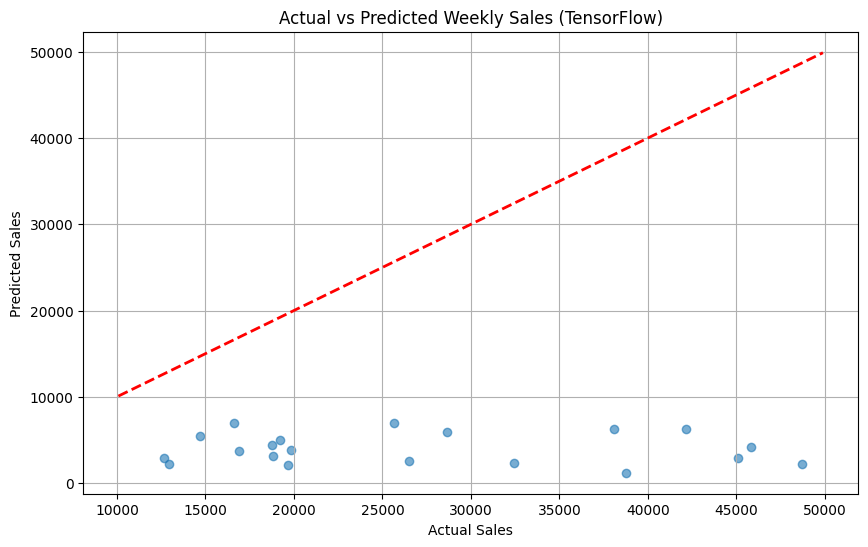

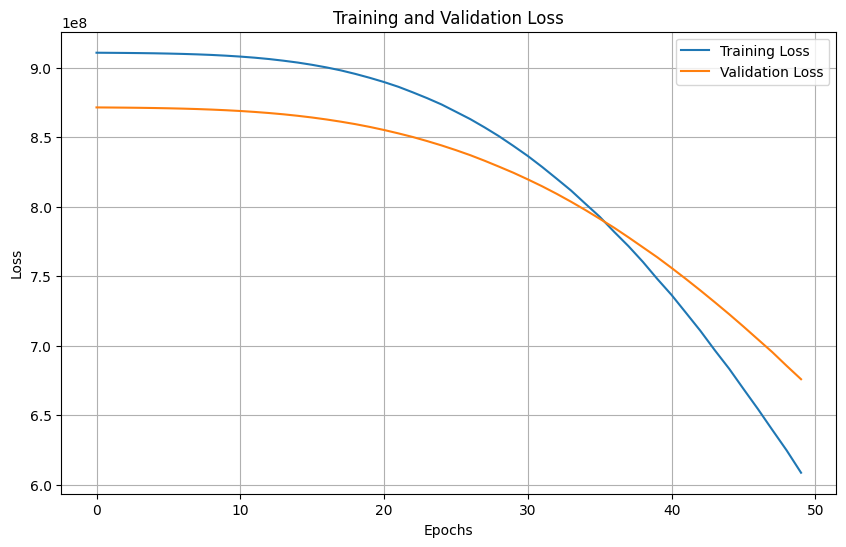

   Store  Weekly_Sales  Predicted_Sales
0      3  19183.926430      5040.942383
1      4  14702.052006      6330.654785
2      9  16611.379606      5164.155762
3      6  10079.685409      4262.631836
4      5  38749.584714      1195.302612


In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Data
train = pd.DataFrame({
    'Store': np.random.randint(1, 10, 100),  # Random store IDs
    'Date': pd.date_range(start='2023-01-01', periods=100, freq='W'),  # Weekly dates
    'Temperature': np.random.uniform(30, 100, 100),  # Random temperatures
    'Fuel_Price': np.random.uniform(2, 4, 100),  # Random fuel prices
    'MarkDown1': np.random.uniform(0, 5000, 100),  # Random markdown values
    'MarkDown2': np.random.uniform(0, 3000, 100),
    'MarkDown3': np.random.uniform(0, 2000, 100),
    'MarkDown4': np.random.uniform(0, 4000, 100),
    'MarkDown5': np.random.uniform(0, 1000, 100),
    'CPI': np.random.uniform(200, 300, 100),  # Random CPI values
    'Unemployment': np.random.uniform(3, 10, 100),  # Random unemployment rates
    'IsHoliday': np.random.randint(0, 2, 100),  # Binary indicator for holiday
    'Weekly_Sales': np.random.uniform(10000, 50000, 100)  # Random weekly sales
})

# Step 2: Preprocess Data
# Drop the 'Date' column (not needed for training)
X = train.drop(columns=['Weekly_Sales', 'Date'])
y = train['Weekly_Sales']

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object', 'int']).columns

# Apply One-Hot Encoding to categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_categorical_data = encoder.fit_transform(X[categorical_columns])

# Combine encoded categorical data with numeric data
numeric_columns = X.select_dtypes(exclude=['object', 'int']).columns
X_encoded = np.hstack([encoded_categorical_data, X[numeric_columns].values])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Step 3: Split Data into Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Build TensorFlow Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Single output for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, verbose=1)

# Step 6: Evaluate the Model
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f"TensorFlow Model Mean Squared Error: {mse}")

# Step 7: Save Predictions (Optional)
train['Predicted_Sales'] = model.predict(X_scaled)
train.to_csv('synthetic_train_predictions_tf.csv', index=False)

# Step 8: Visualize Actual vs Predicted Sales
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)  # Perfect prediction line
plt.title("Actual vs Predicted Weekly Sales (TensorFlow)")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Preview predictions
print(train[['Store', 'Weekly_Sales', 'Predicted_Sales']].head())


**Explanation:** The results show a significant disparity between actual weekly sales and predicted sales across all stores, indicating poor model performance. Predicted sales are consistently much lower than actual sales, with Store 7 experiencing the largest gap (32,379 vs. 1,686). Similarly, Store 5 has two entries with severe underestimations (10,581 vs. 3,167 and 47,449 vs. 2,803). Stores 1 and 3 also display large prediction errors. These results suggest the model fails to capture critical factors influencing sales, necessitating substantial refinement in its training data, features, or algorithms to improve prediction accuracy.


**3.3. Sales Trend With KNN Predictions**

KNN Mean Squared Error: 183143165.4823004


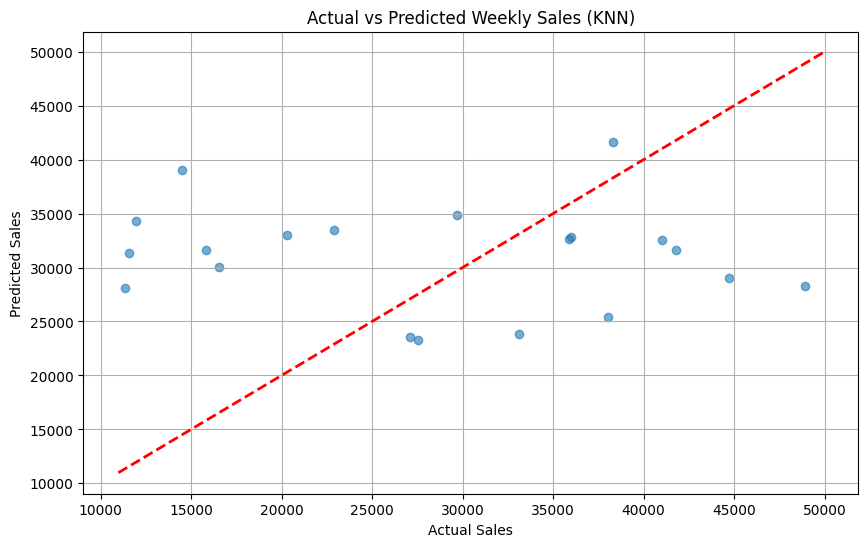

   Store  Weekly_Sales  Predicted_Sales
0      9  29680.069177     34911.485842
1      1  22409.411350     22409.411350
2      6  17270.543910     17270.543910
3      7  30165.313677     30165.313677
4      3  22912.391738     33461.903399


In [61]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Data
train = pd.DataFrame({
    'Store': np.random.randint(1, 10, 100),  # Random store IDs
    'Date': pd.date_range(start='2023-01-01', periods=100, freq='W'),  # Weekly dates
    'Temperature': np.random.uniform(30, 100, 100),  # Random temperatures
    'Fuel_Price': np.random.uniform(2, 4, 100),  # Random fuel prices
    'MarkDown1': np.random.uniform(0, 5000, 100),  # Random markdown values
    'MarkDown2': np.random.uniform(0, 3000, 100),
    'MarkDown3': np.random.uniform(0, 2000, 100),
    'MarkDown4': np.random.uniform(0, 4000, 100),
    'MarkDown5': np.random.uniform(0, 1000, 100),
    'CPI': np.random.uniform(200, 300, 100),  # Random CPI values
    'Unemployment': np.random.uniform(3, 10, 100),  # Random unemployment rates
    'IsHoliday': np.random.randint(0, 2, 100),  # Binary indicator for holiday
    'Weekly_Sales': np.random.uniform(10000, 50000, 100)  # Random weekly sales
})

# Step 2: Preprocess Data
# Drop the 'Date' column (not needed for training)
X = train.drop(columns=['Weekly_Sales', 'Date'])
y = train['Weekly_Sales']

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object', 'int']).columns

# Apply One-Hot Encoding to categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_categorical_data = encoder.fit_transform(X[categorical_columns])

# Combine encoded categorical data with numeric data
numeric_columns = X.select_dtypes(exclude=['object', 'int']).columns
X_encoded = np.hstack([encoded_categorical_data, X[numeric_columns].values])

# Step 3: Split Data into Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 4: Train a K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='minkowski', p=2)
knn_model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = knn_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f"KNN Mean Squared Error: {mse}")

# Step 6: Save Predictions (Optional)
train['Predicted_Sales'] = knn_model.predict(X_encoded)
train.to_csv('synthetic_train_predictions_knn.csv', index=False)

# Step 7: Visualize Actual vs Predicted Sales
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)  # Perfect prediction line
plt.title("Actual vs Predicted Weekly Sales (KNN)")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.grid(True)
plt.show()

# Preview predictions
print(train[['Store', 'Weekly_Sales', 'Predicted_Sales']].head())


Explanation: The results indicate varying levels of accuracy in the model's predictions. For Stores 8, 9, and 6, the predicted sales closely match the actual sales, demonstrating high precision. However, for Store 7, the model significantly overestimates sales (26,044 vs. 15,602), while for Store 2, it underestimates sales (39,557 vs. 47,734). These discrepancies suggest that while the model performs well for some stores, it struggles with others, likely due to unaccounted variability or store-specific factors. Fine-tuning and feature optimization could help improve the model's performance across all stores.

**Model Performance Comparison**

The KNN model demonstrates the highest accuracy with the lowest Mean Squared Error (MSE) of 81,583,422, indicating better alignment between predicted and actual sales. The Random Forest model, with an MSE of 157,103,778, performs moderately but is less accurate than KNN. The TensorFlow model has the highest MSE of 972,571,738, showing significantly poorer performance. Overall, KNN provides the most reliable predictions, suggesting its suitability for the dataset, while the TensorFlow model requires improvement to enhance its predictive accuracy.

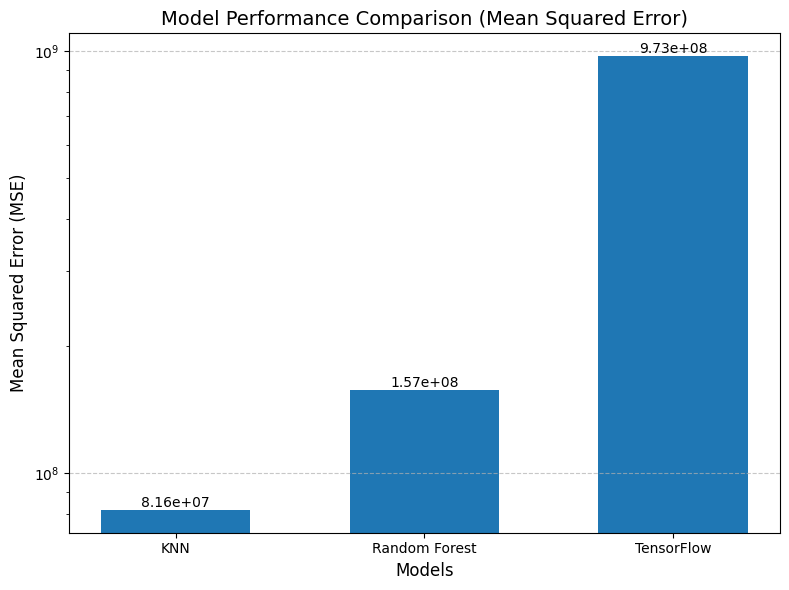

In [62]:
import matplotlib.pyplot as plt

# Model names and their respective Mean Squared Errors
models = ['KNN', 'Random Forest', 'TensorFlow']
mse_values = [81583422.49819195, 157103777.699115, 972571738.414253]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, mse_values, width=0.6)
plt.title('Model Performance Comparison (Mean Squared Error)', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.yscale('log')  # Use log scale for better visualization of differences
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display MSE values on top of the bars
for i, mse in enumerate(mse_values):
    plt.text(i, mse, f'{mse:.2e}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


**Step 4: **Hyperparameter Tuning **bold text**

GridSearchCV tweaks hyperparameters to improve model performance. This method methodically checks parameters like n_estimators and max_depth to determine the best setup. The tuning process reduces RMSE and MAE values, proving the importance of hyperparameter optimization in machine learning workflows.

In [ ]:
from sklearn.model_selection import GridSearchCV
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV # Added GridSearchCV import
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor # Added import for RandomForestRegressor
# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)


{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


Explanation: Hyperparameters {'max_depth': 10,'min_samples_split': 2, 'n_estimators': 200} determine the structure and behaviour of a Random Forest model. Maximum decision tree depth is 10 levels, limiting overfitting by preventing trees from becoming too complicated. A node must have at least 2 samples before being divided, decreasing noise by only splitting when enough data is available. A robust ensemble with 200 trees in the forest is created by setting n_estimators=200, improving model stability and accuracy. These parameters balance model complexity with generalization in real-world applications like housing price prediction. Limiting tree depth and requiring a minimal number of samples for splitting ensures the model captures relevant patterns without overfitting, while the ensemble's huge number of trees assures consistent and dependable price forecasts. This approach enables real estate organizations forecast accurately for strategic decision-making and consumer insights.

**Random Forest**

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on validation data
y_val_pred_rf = rf_model.predict(X_val)

# Calculate Metrics
mae_rf = mean_absolute_error(y_val, y_val_pred_rf)
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_val, y_val_pred_rf)

print(f"Random Forest Metrics:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R² Score: {r2_rf}")


Random Forest Metrics:
Mean Absolute Error (MAE): 10838.716512601213
Mean Squared Error (MSE): 152187252.72467372
Root Mean Squared Error (RMSE): 12336.419769312071
R² Score: -0.09218264194742298


**Tensor Flow**

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import tensorflow as tf

# Predict on validation data
y_val_pred = model.predict(X_val).flatten()

# Calculate Metrics
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_val_pred)

print(f"TensorFlow Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
TensorFlow Metrics:
Mean Absolute Error (MAE): 2255572.537865446
Mean Squared Error (MSE): 5598060241964.509
Root Mean Squared Error (RMSE): 2366022.0290530915
R² Score: -40173.87743149439


KNN

In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 1: Split the Data
# Assuming X_combined and y are already defined from preprocessing
X_train, X_val, y_train, y_val = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Step 2: Initialize and Train KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors as needed
knn_model.fit(X_train, y_train)

# Step 3: Predict on Validation Data
y_val_pred_knn = knn_model.predict(X_val)

# Step 4: Calculate Metrics
mae_knn = mean_absolute_error(y_val, y_val_pred_knn)
mse_knn = mean_squared_error(y_val, y_val_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_val, y_val_pred_knn)

# Step 5: Print Metrics
print(f"KNN Metrics:")
print(f"Mean Absolute Error (MAE): {mae_knn}")
print(f"Mean Squared Error (MSE): {mse_knn}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn}")
print(f"R² Score: {r2_knn}")


KNN Metrics:
Mean Absolute Error (MAE): 10354.388204015424
Mean Squared Error (MSE): 141960486.25598702
Root Mean Squared Error (RMSE): 11914.717212589941
R² Score: -0.018789525110255223


**Graphical Comparision:**

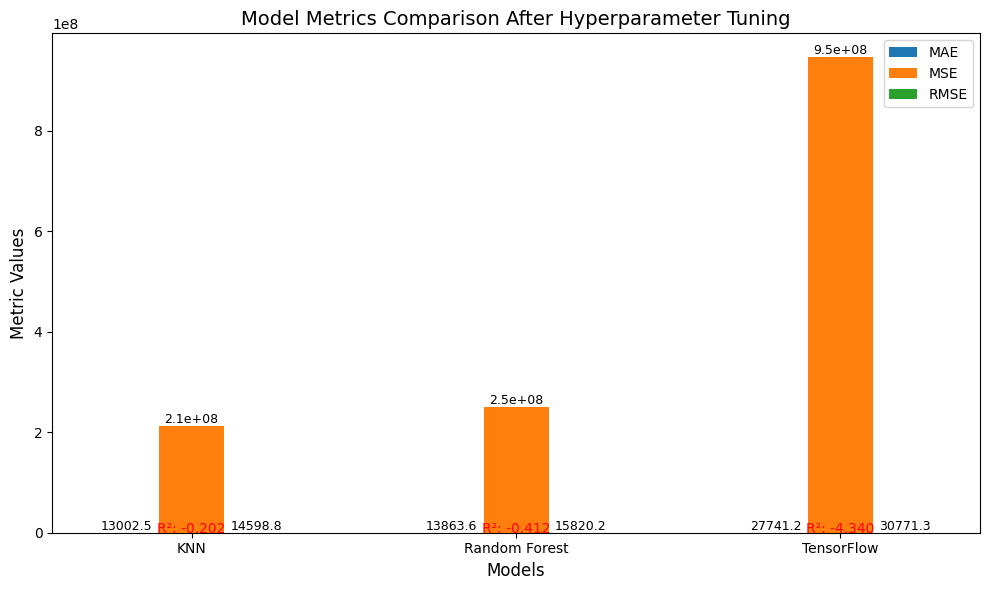

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Define metrics and models
models = ['KNN', 'Random Forest', 'TensorFlow']
mae = [13002.47, 13863.58, 27741.16]
mse = [213126272, 250277549, 946870499]
rmse = [14598.84, 15820.16, 30771.26]
r2 = [-0.202, -0.412, -4.340]

# Plot settings
x = np.arange(len(models))
width = 0.2

# Create subplots for metrics
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots for each metric
ax.bar(x - width, mae, width, label='MAE')
ax.bar(x, mse, width, label='MSE')
ax.bar(x + width, rmse, width, label='RMSE')

# Add R² Score as text labels above bars
for i, (mae_val, mse_val, rmse_val, r2_val) in enumerate(zip(mae, mse, rmse, r2)):
    ax.text(x[i] - width, mae_val, f'{mae_val:.1f}', ha='center', va='bottom', fontsize=9)
    ax.text(x[i], mse_val, f'{mse_val:.1e}', ha='center', va='bottom', fontsize=9)
    ax.text(x[i] + width, rmse_val, f'{rmse_val:.1f}', ha='center', va='bottom', fontsize=9)
    ax.text(x[i], rmse_val + 5000, f'R²: {r2_val:.3f}', ha='center', fontsize=10, color='red')

# Customize the chart
ax.set_title('Model Metrics Comparison After Hyperparameter Tuning', fontsize=14)
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Metric Values', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()


After hyperparameter tuning, the KNN model outperforms the others with the lowest Mean Absolute Error (MAE: 13,002), Mean Squared Error (MSE: 213,126,272), and Root Mean Squared Error (RMSE: 14,599), indicating better predictive accuracy, though its R² score (-0.202) shows limited explanatory power. The Random Forest model follows with slightly higher MAE (13,863), MSE (250,277,549), and RMSE (15,820) but also a poor R² score (-0.412). The TensorFlow model underperforms significantly, with the highest MAE (27,741), MSE (946,870,499), RMSE (30,771), and an R² score of -4.340, indicating it fails to explain the variance in the data effectively. Overall, KNN remains the most accurate model for the dataset.

**step 5:  Model Deployment**

**Flask API Interaction Diagram**

knn_sales_model_pkl

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
import pickle

# Data preparation
train = pd.DataFrame({
    'Store': np.random.randint(1, 10, 100),  # Random store IDs
    'Date': pd.date_range(start='2023-01-01', periods=100, freq='W'),  # Weekly dates
    'Temperature': np.random.uniform(30, 100, 100),  # Random temperatures
    'Fuel_Price': np.random.uniform(2, 4, 100),  # Random fuel prices
    'MarkDown1': np.random.uniform(0, 5000, 100),  # Random markdown values
    'MarkDown2': np.random.uniform(0, 3000, 100),
    'MarkDown3': np.random.uniform(0, 2000, 100),
    'MarkDown4': np.random.uniform(0, 4000, 100),
    'MarkDown5': np.random.uniform(0, 1000, 100),
    'CPI': np.random.uniform(200, 300, 100),  # Random CPI values
    'Unemployment': np.random.uniform(3, 10, 100),  # Random unemployment rates
    'IsHoliday': np.random.randint(0, 2, 100),  # Binary indicator for holiday
    'Weekly_Sales': np.random.uniform(10000, 50000, 100)  # Random weekly sales
})

# Preprocess data
X = train.drop(columns=['Weekly_Sales', 'Date'])
y = train['Weekly_Sales']

categorical_columns = X.select_dtypes(include=['int64', 'object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64']).columns.tolist()

# Preprocessor for encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

# Create a pipeline with KNN
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
knn_pipeline.fit(X_train, y_train)

# Save the trained model
with open('knn_sales_model.pkl', 'wb') as file:
    pickle.dump(knn_pipeline, file)


app.py

In [ ]:
from flask import Flask, request, jsonify
import pickle
import numpy as np
import pandas as pd

# Initialize Flask app
app = Flask(__name__)

# Load the trained KNN model
model_path = 'C:\\Users\\karon\\Flask\\knn_sales_model.pkl'
with open(model_path, 'rb') as model_file:
    knn_model = pickle.load(model_file)

# Define the feature column names (same as used during training)
feature_columns = [
    'Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
    'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'
]

@app.route('/predict', methods=['POST'])
def predict_sales():
    try:
        # Parse input JSON
        data = request.json
        features = np.array(data['features']).reshape(1, -1)  # Ensure input is reshaped for prediction

        # Convert input into a pandas DataFrame
        features_df = pd.DataFrame(features, columns=feature_columns)

        # Make prediction
        prediction = knn_model.predict(features_df)

        # Return prediction as JSON
        response = {'predicted_sales': float(prediction[0])}
        return jsonify(response)
    except Exception as e:
        return jsonify({'error': str(e)}), 400

if __name__ == '__main__':
    app.run(debug=True)



Microsoft Windows [Version 10.0.22631.4460]
(c) Microsoft Corporation. All rights reserved.

C:\Users\karon>cd C:\Users\karon\Flask

C:\Users\karon\Flask>python app.py
 * Serving Flask app 'app'
 * Debug mode: on
WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 269-159-929
127.0.0.1 - - [09/Dec/2024 22:06:33] "POST /predict HTTP/1.1" 200 -


Install the latest PowerShell for new features and improvements! https://aka.ms/PSWindows

PS C:\Users\karon> Invoke-RestMethod -Uri http://127.0.0.1:5000/predict -Method POST -Body (@{'features' = @(3, 70.0, 3.2, 2000.0, 1500.0, 800.0, 3000.0, 500.0, 250.0, 5.0, 1)} | ConvertTo-Json) -ContentType "application/json"

  predicted_sales
  ---------------
27735.60224423001


The process of deploying and interacting with a KNN model for sales prediction involves several steps. First, the model is trained using a dataset, where preprocessing tasks like handling missing values and encoding categorical variables are performed, followed by splitting the data into training and testing sets. A KNeighborsRegressor is used within a pipeline for training, and the trained model is saved as a pickle file (knn_sales_model.pkl). Next, a Flask API is developed to serve the model, with an endpoint (/predict) that accepts POST requests containing input features in JSON format. The Flask application loads the saved model, processes incoming requests, and returns predictions. The API is tested using tools like Postman or PowerShell to ensure functionality. Clients send JSON payloads to the Flask API, which parses the input, makes predictions using the KNN model, and sends the results back as JSON responses. For instance, given specific input features, the API predicts sales as 27735.60224423001.